In [94]:
###AVISO::: TEM QUE SUBSTITUIR O RANGE (linha 19) PARA NÃO TER DUPLICATAS, VISTO QUE O SITE RETORNA PARA A 
### PRIMEIRA PÁGINA SE ELE NÃO ACHAR A PÁGINA QUE PROCUROU

###Como tem anúncios patrocinados no site que estarão de volta ao topo em toda lista, temos que remover as duplicatas

#Biblioteca para a mineração de dados
from bs4 import BeautifulSoup

#Biblioteca para lidar com o HTTP 
import requests

#Biblioteca para exportar para csv
import pandas as pd

#Bibliotecas para visualização gráfica dos dados
import seaborn as sns 
import matplotlib.pyplot as plt

#Função para remover espaços brancos do dataframe
def remover_espacos(df):
    df_obj = df.select_dtypes(['object'])
    df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
    
#Função para retirar o tipo de casa da coluna Titulo e separar em duas colunas novas
def separar_tipo_casa(df):
    df[['Tipo_De_Casa', 'Nome']] = df['Titulo'].str.split(' ', 1, expand=True)
    df.drop(columns=['Titulo'], inplace=True)
    
#Função para retirar o permonth da coluna Preço e transformar ela em numérica 
def arrumar_preco(df):
    series = df['Preco']
    preco_numerico = series.str.strip('€per month')
    preco_sem_virgula = preco_numerico.str.replace(',', '')
    df['Preco_Em_Euros'] = pd.to_numeric(preco_sem_virgula)
    df.drop(columns=['Preco'], inplace=True)
    
#Criando o dataframe 
casas = pd.DataFrame(columns=['Titulo', 'Localizacao', 'Preco', 'Tamanho'])

#Contador para ir para as próximas páginas, mas é necessário contar quantas páginas tem e substituir no range
for contador in range(18):
    url = f'https://www.pararius.com/apartments/amsterdam/page-{contador}'

    page = requests.get(url)
    #Aqui é importante dar um print(page) para ver se o request é 200, ou seja, se deu certo o request para a página

    soup = BeautifulSoup(page.content, 'html.parser')
    lists = soup.find_all('section')

    for list in lists:
        title = list.find('a', class_ = 'listing-search-item__link--title').text.replace('\n', '')
        location = list.find('div', class_ = 'listing-search-item__sub-title').text.replace('\n', '')
        price = list.find('div', class_ = 'listing-search-item__price').text.replace('\n', '')
        size = list.find('ul', class_ = 'illustrated-features').text.replace('\n', '')
        info = [title, location, price, size]
        casas.loc[len(casas.index)] = info

remover_espacos(casas)
separar_tipo_casa(casas)
arrumar_preco(casas)

In [95]:
display(casas)

,Localizacao,Tamanho,Tipo_De_Casa,Nome,Preco_Em_Euros
0,1058 LT Amsterdam (Hoofddorppleinbuurt),85 m²4 roomsFurnished,Apartment,Hillegomstraat 32 2,2800
1,1054 AT Amsterdam (Helmersbuurt),155 m²5 roomsFurnished,Apartment,Bosboom Toussaintstraat,4500
2,1079 AM Amsterdam (Scheldebuurt),121 m²4 roomsFurnished,Apartment,Rooseveltlaan,3995
3,1077 CR Amsterdam (Apollobuurt),100 m²3 roomsUpholstered,Apartment,Olympiaplein,2700
4,1078 TE Amsterdam (IJselbuurt),65 m²3 roomsUpholstered,Apartment,Meerhuizenstraat,1975
...,...,...,...,...,...
552,1075 EZ Amsterdam (Willemspark),193 m²5 roomsUpholstered,Apartment,Valeriusstraat 219 2,5500
553,1078 AZ Amsterdam (Scheldebuurt),93 m²4 roomsFurnished,Apartment,Amstelkade,2500
554,1093 ED Amsterdam (Dapperbuurt),63 m²2 rooms1882,Apartment,Linnaeusstraat,2300
555,1015 DE Amsterdam (Grachtengordel-West),95 m²2 roomsFurnished,Apartment,Leliegracht 12 1,2250


In [99]:
#Função para limpar a coluna localização e separar entre número da casa e lugar dela
def limpar_localizacao(df):
    series = df['Localizacao']
    lista_numeros = []
    lista_localizacoes = []
    
    for entrada in series.str.split():
        lista_numeros.append(entrada[0])
        lista_localizacoes.append(entrada[3])
    
    df['Numero_Do_Imovel'] = lista_numeros
    df['Localizacao_Do_Imovel'] = lista_localizacoes
    df.drop(columns=['Localizacao'], inplace=True)

#limpar_localizacao(casas)
casas.dtypes

Tamanho                  object
Tipo_De_Casa             object
Nome                     object
Preco_Em_Euros            int64
Numero_Do_Imovel         object
Localizacao_Do_Imovel    object
dtype: object

In [70]:
series = casas['Localizacao']
#teste = series.str.split()
lista_numeros, lista_localizacoes = [], []
for linha in series:
    lista_numeros.append(linha[0])
    lista_localizacoes.append(linha[3])

print(lista_numeros)

KeyError: 'Localizacao'

<AxesSubplot:title={'center':'Tipos de Imóveis'}, xlabel='Tipo_De_Casa', ylabel='count'>

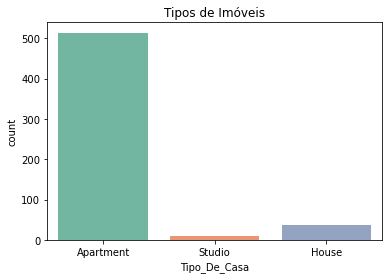

In [41]:
plt.title('Tipos de Imóveis')
plt.ylabel('Número de Imóveis')
sns.countplot(x='Tipo_De_Casa', palette='Set2', data=casas)